In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/fashion-mnist_test.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.shape

(10000, 785)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
X = df.drop('label', axis=1)
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [8]:
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8597


In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       274
           1       0.99      0.94      0.97       286
           2       0.78      0.79      0.78       305
           3       0.83      0.91      0.87       284
           4       0.77      0.85      0.81       295
           5       0.94      0.95      0.95       307
           6       0.70      0.54      0.61       314
           7       0.91      0.92      0.92       316
           8       0.95      0.94      0.95       306
           9       0.95      0.93      0.94       313

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000


Confusion Matrix:
[[228   0   3  21   0   0  21   0   1   0]
 [  1 269   4  10   0   0   2   0   0   0]
 [  4   0 240   0  36   0  22   0   3   0]
 [  7   2   3 258   5   0   8   0   1   0]
 [  0   0  25   5 250   0 

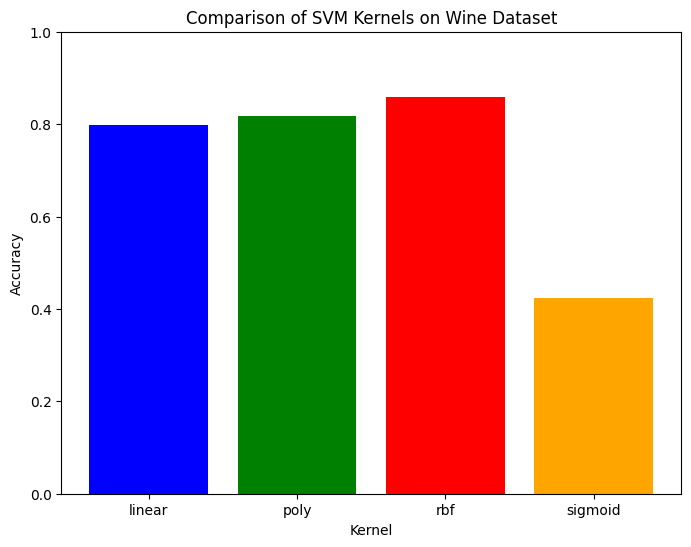

Kernel: linear
Confusion Matrix:
[[193   1   6  20   0   0  51   0   3   0]
 [  0 272   4   9   0   0   1   0   0   0]
 [ 12   0 223   2  41   0  26   0   1   0]
 [ 22   4   7 236   6   0   8   0   1   0]
 [  1   1  52   7 213   0  21   0   0   0]
 [  0   0   0   0   0 282   1  13   1  10]
 [ 66   2  52  14  38   0 136   0   6   0]
 [  0   0   0   0   0  27   0 274   0  15]
 [ 12   0   5   3   1   1   4   2 276   2]
 [  0   0   0   0   0   9   0  15   0 289]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.67       274
           1       0.97      0.95      0.96       286
           2       0.64      0.73      0.68       305
           3       0.81      0.83      0.82       284
           4       0.71      0.72      0.72       295
           5       0.88      0.92      0.90       307
           6       0.55      0.43      0.48       314
           7       0.90      0.87      0.88       316
           8       0.96   

In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:

    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)

    # Prediction
    y_pred = svm.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = {'model': svm, 'accuracy': accuracy, 'y_pred': y_pred}

# Plot the results
accuracies = [results[kernel]['accuracy'] for kernel in kernels]
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of SVM Kernels on Wine Dataset')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Results
for kernel in kernels:
    print(f"Kernel: {kernel}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, results[kernel]['y_pred']))
    print("Classification Report:")
    print(classification_report(y_test, results[kernel]['y_pred']))
    print("\n")
